In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import time

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [2]:
def rosenbrock(X):
    x, y= X
    return (1 - x)**2 + 100*(y- x**2)**2


def grad_rosenbrock(X):
    x, y= X
    df_dx= -2*(1-x) - 400*x*(y-x**2)
    df_dy= 200*(y - x**2)
    return np.array([df_dx, df_dy])

def hessian_rosenbrock(X):
    x, y= X
    d2f_dx2= 2-400*y + 1200 * x**2
    d2f_dxdy= -400*x
    d2f_dy2= 200
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

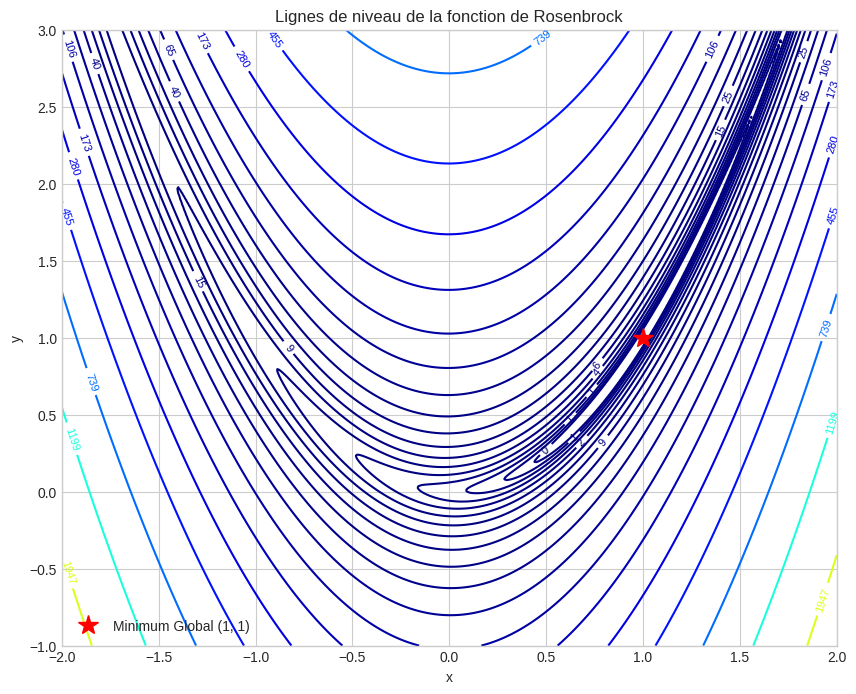

In [3]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

plt.figure(figsize=(10,8))
contours = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap='jet')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(1, 1, 'r*', markersize=15, label='Minimum Global (1, 1)')
plt.title('Lignes de niveau de la fonction de Rosenbrock')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
def gradient_descent_fixed(start_point, pas, num_iter, tol=1e-6):
    x= np.array(start_point)
    history= [x.copy()]

    start_time = time.time()

    for i in range(num_iter):
        grad = grad_rosenbrock(x)

        if np.linalg.norm(grad) < tol:
            break

        x= x- pas*grad
        history.append(x.copy())
        
    end_time = time.time()
    return np.array(history), end_time- start_time

start =[-1.2, 1.0]
lr = 0.002
iters = 1000

pas_fixe, time_fixe= gradient_descent_fixed(start, lr, iters)

print(f"--Gradient à Pas Fixe (pas={lr}) ---")
print(f"Point de depart: {start}")
print(f"Point final: {pas_fixe[-1]}")
print(f"Valeur finale f(x): {rosenbrock(pas_fixe[-1]):.6f}")
print(f"Nombres d'iterations: {len(pas_fixe) -1}")
print(f"Temps d'xecution: {time_fixe:.4f} sec")

--Gradient à Pas Fixe (pas=0.002) ---
Point de depart: [-1.2, 1.0]
Point final: [0.7344031  0.53811088]
Valeur finale f(x): 0.070695
Nombres d'iterations: 1000
Temps d'xecution: 0.0250 sec


In [5]:
def gradient_descent_optimal(start_point, num_iter, tol=1e-6):
    x= np.array(start_point)
    history = [x.copy()]

    start_time = time.time()

    for i in range(num_iter):
        grad = grad_rosenbrock(x)

        if np.linalg.norm(grad) < tol:
            break

        def func_to_minimize(s):
            return rosenbrock(x-s*grad)

        res = minimize_scalar(func_to_minimize, bounds=(0, 1), method='bounded')
        optimal_step = res.x

        x = x -optimal_step * grad
        history.append(x.copy())

    end_time = time.time()
    return np.array(history), end_time - start_time

start=[-1.2, 1.0]

pas_optimal, time_optimal=gradient_descent_optimal(start, 2000)

print(f"--- Gradient a pas optimal ---")
print(f"Point de depart: {start}")
print(f"Point final: {pas_optimal[-1]}")
print(f"Valeur finale f(x): {rosenbrock(pas_optimal[-1]):.6f}")
print(f"Nombres d'iterations: {len(pas_optimal) -1}")
print(f"Temps d'xecution: {time_optimal:.4f} sec")

--- Gradient a pas optimal ---
Point de depart: [-1.2, 1.0]
Point final: [1.00000078 1.00000157]
Valeur finale f(x): 0.000000
Nombres d'iterations: 137
Temps d'xecution: 0.0411 sec


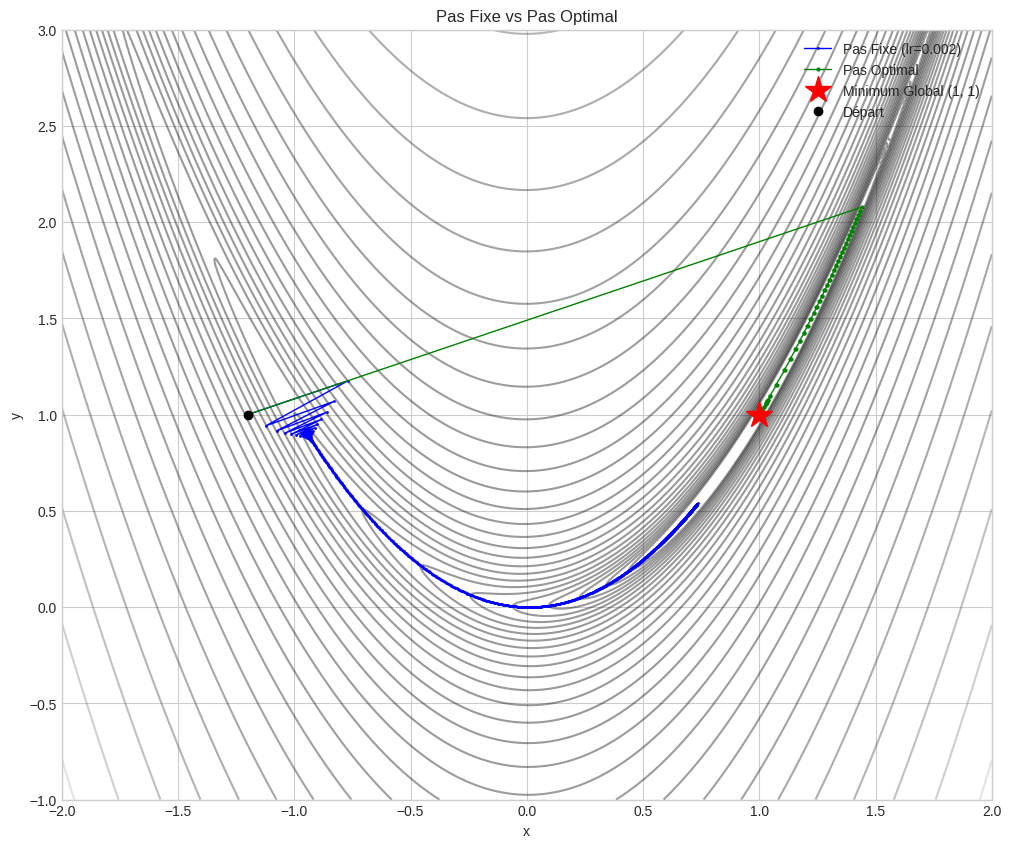

In [6]:
plt.figure(figsize=(12, 10))


X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
Z = rosenbrock([X, Y])
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 30), cmap='gray', alpha=0.4)

plt.plot(pas_fixe[:, 0], pas_fixe[:, 1], 'b.-', label='Pas Fixe (lr=0.002)', linewidth=1, markersize=2)

plt.plot(pas_optimal[:, 0], pas_optimal[:, 1], 'g.-', label='Pas Optimal', linewidth=1, markersize=4)

plt.plot(1, 1, 'r*', markersize=20, label='Minimum Global (1, 1)')
plt.plot(start[0], start[1], 'ko', label='Départ')

plt.title('Pas Fixe vs Pas Optimal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

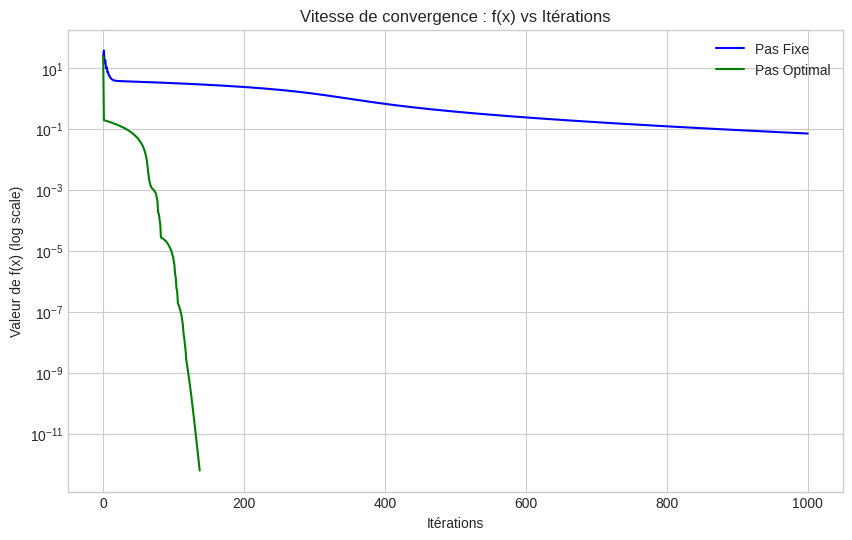

In [7]:
val_fixe = [rosenbrock(x) for x in pas_fixe]
val_opti = [rosenbrock(x) for x in pas_optimal]

plt.figure(figsize=(10, 6))
plt.plot(val_fixe, 'b-', label='Pas Fixe')
plt.plot(val_opti, 'g-', label='Pas Optimal')

plt.yscale('log') 
plt.xlabel('Itérations')
plt.ylabel('Valeur de f(x) (log scale)')
plt.title('Vitesse de convergence : f(x) vs Itérations')
plt.legend()
plt.grid(True)
plt.show()

### Observations

1.  **Topologie de la fonction :** La fonction de Rosenbrock présente une vallée courbe très plate. Le gradient pointe souvent vers les murs de la vallée plutôt que le long de la vallée vers le minimum (1,1).
2.  **Pas Fixe :**
    *   Nécessite un pas extrêmement petit ($\approx 0.002$) pour ne pas diverger.
    *   La convergence est très lente (On'a besoin de plusieurs itérations).
3.  **Pas Optimal :**
    *   Chaque itération coûte plus cher en calcul (car il faut résoudre une mini-optimisation pour trouver le pas).
    *   On observe le phénomène de **zigzag** , ce qui ralentit la progression au fond de la vallée.
    *   Néanmoins, il converge généralement en moins d'itérations que le pas fixe mal réglé.